<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'Orange'> Reading the Dataset </font>

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 24.1MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detecting the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               754 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             760 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [4]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Pregnancies,14
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,10
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
missing_values_percentage = 100 * missing_values_count / len(df)
missing_values_percentage

,0
Pregnancies,1.822917
Glucose,0.000000
BloodPressure,0.000000
SkinThickness,1.041667
Insulin,0.000000
BMI,1.302083
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [6]:
missing = pd.concat([missing_values_count, missing_values_percentage], axis=1)
missing.columns = ['# of missing values', '% of missing values']
missing

,# of missing values,% of missing values
Pregnancies,14,1.822917
Glucose,0,0.000000
BloodPressure,0,0.000000
SkinThickness,8,1.041667
Insulin,0,0.000000
BMI,10,1.302083
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


Dependence between the columns with missing values with the help of visualization matrix, heatmap, dendrogram

<Axes: >

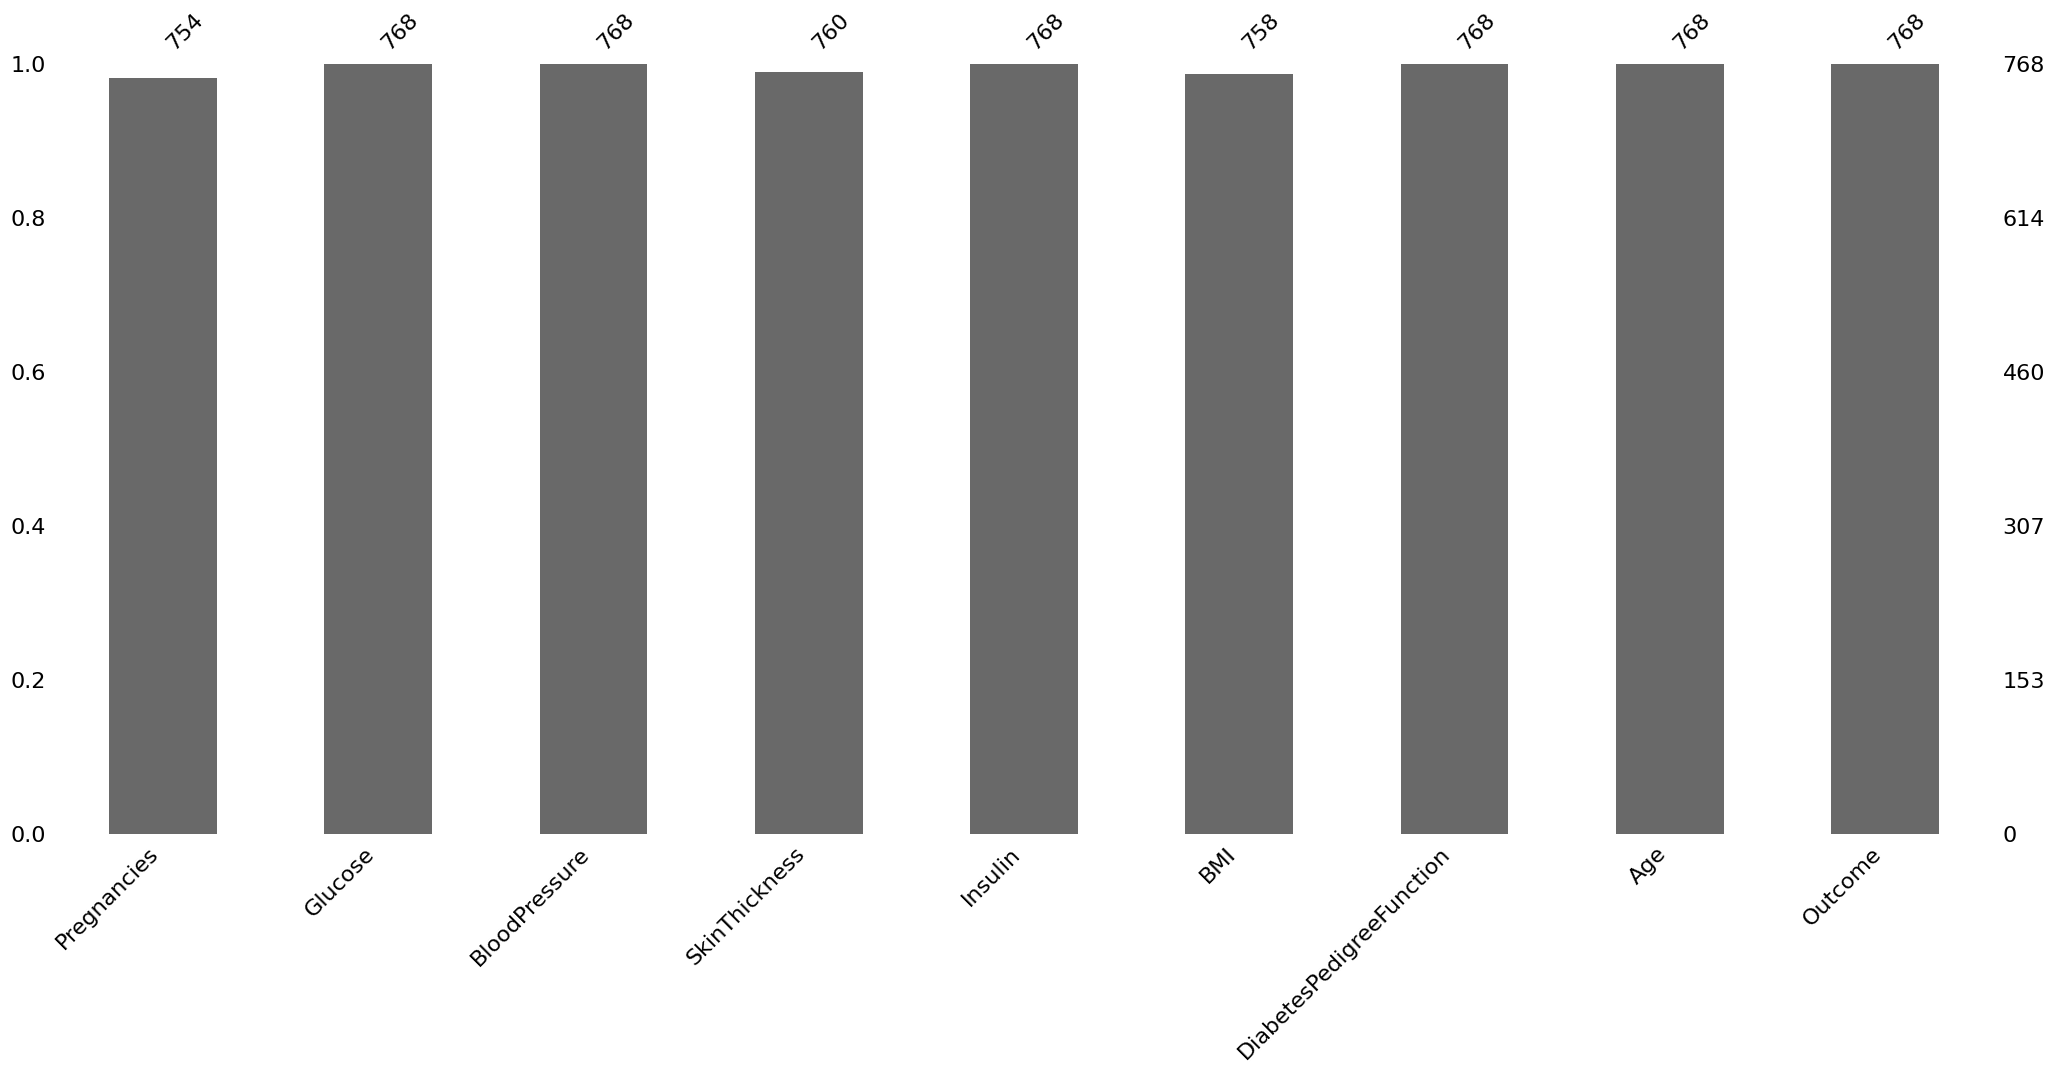

In [7]:
!pip install missingno
import missingno as msno

msno.bar(df)

<Axes: >

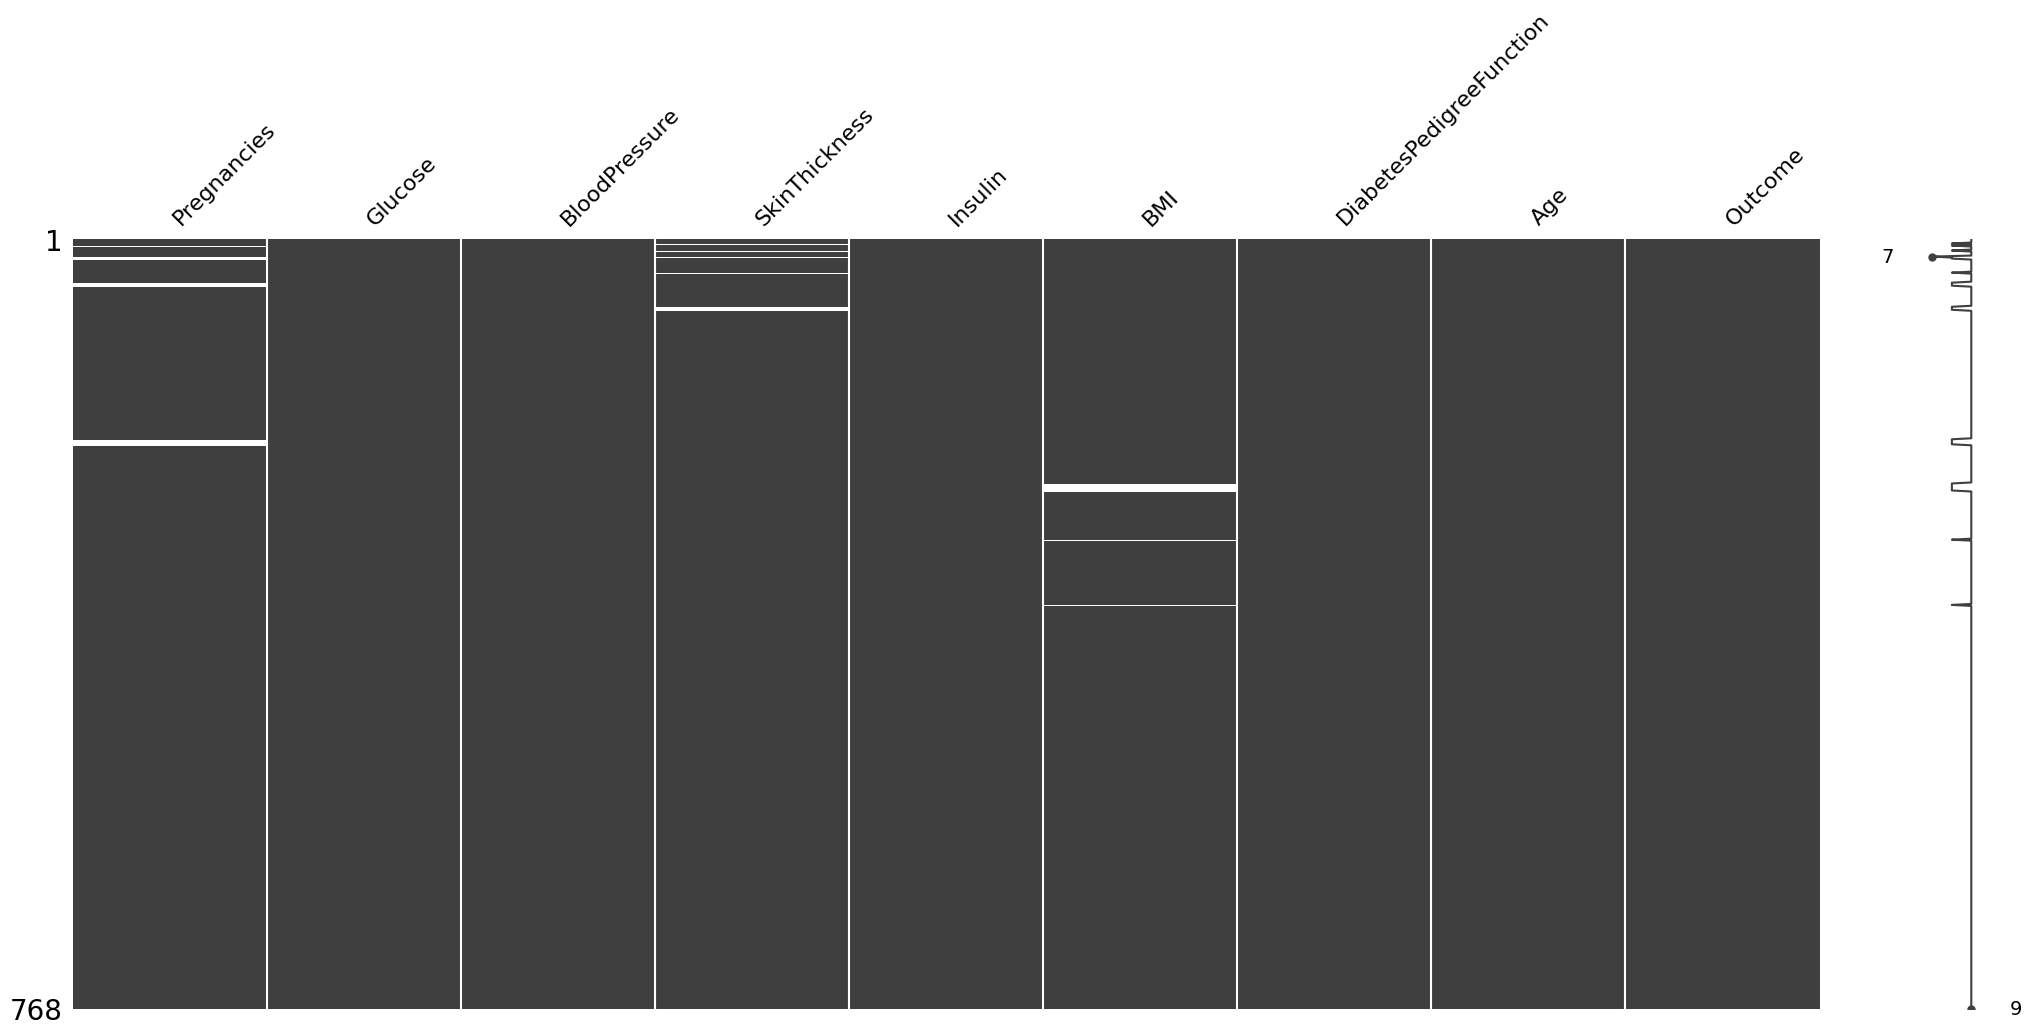

In [9]:
msno.matrix(df)

<Axes: >

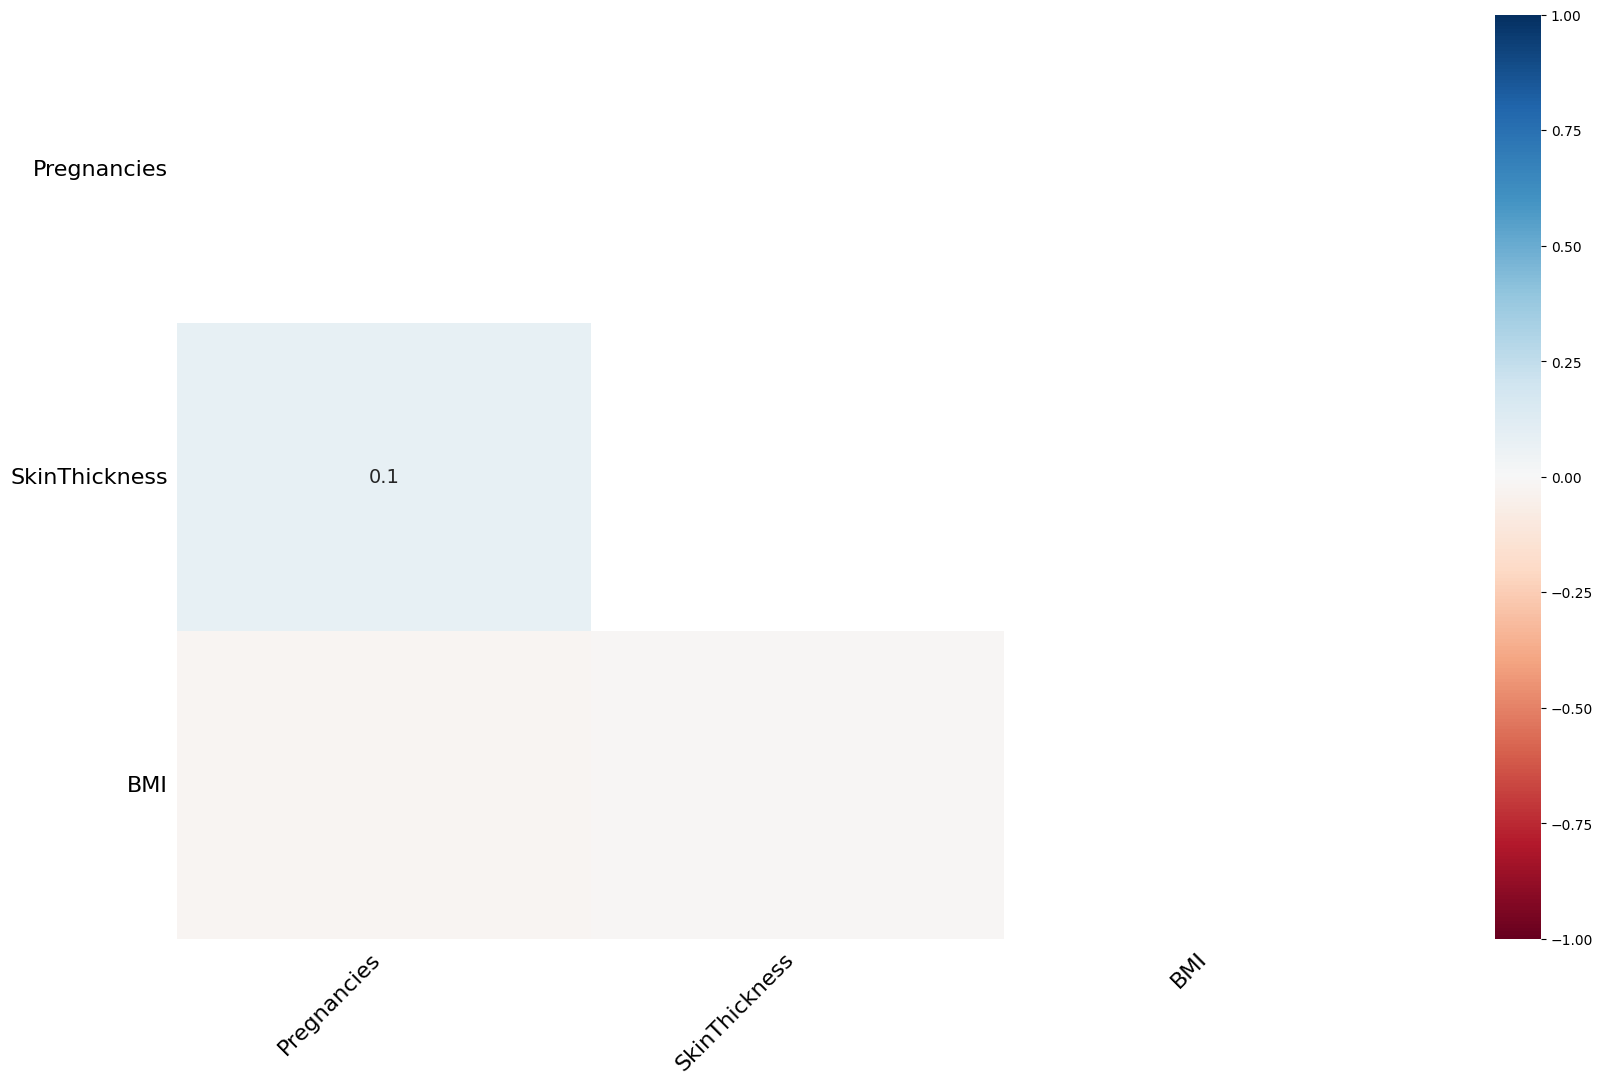

In [8]:
msno.heatmap(df)

There is no strong correlation between the missing values, there is only very weak positvie correlation from 0.1 between the attributes SkinThickness and Pregnancies. That means when SkinThickness is missing, the Pregnancies is slightly more likely to also be missing and vice versa.

## <font color = 'Orange'>Handling the missing values</font>

In [10]:
missing_values_count

,0
Pregnancies,14
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,10
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
df_copy = df.copy()
df_copy['BMI'].mean()
df_copy.dropna(subset=['BMI'], how='any', inplace=True)
df_copy.isnull().sum()

,0
Pregnancies,14
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', fill_value=0)
df_copy['SkinThickness'] = imputer.fit_transform(df_copy[['SkinThickness']])
df_copy.isnull().sum()

,0
Pregnancies,14
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

k = 2

scaler = MinMaxScaler()
df_copy['Pregnancies'] = scaler.fit_transform(df_copy['Pregnancies'].to_numpy().reshape(-1, 1))
imputer = KNNImputer(n_neighbors=k)
df_copy['Pregnancies'] = imputer.fit_transform(df_copy['Pregnancies'].to_numpy().reshape(-1, 1))
df_copy['Pregnancies'].head(20)
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## <font color = 'Orange'>Saving the new Dataset(.csv) without the missing values</font>

In [14]:
df_copy.to_csv('cleaned_data.csv', index=False)

In [15]:
df = pd.read_csv('cleaned_data.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,148,72,35.0,0,33.6,0.627,50,1
1,0.058824,85,66,29.0,0,26.6,0.351,31,0
2,0.470588,183,64,0.0,0,23.3,0.672,32,1
3,0.058824,89,66,23.0,94,28.1,0.167,21,0
4,0.000000,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Spliting the dataset for training and testing in ratio 80:20 </font>


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df["Outcome"], test_size=0.2)

## <font color = 'Orange'>Initializing the KNN Classification model, and use the fit function for training the model</font>

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

## <font color = 'Orange'>Predicting the outcomes for X test</font>

In [18]:
y_pred = knn_classifier.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

## <font color = 'Orange'>Model performance, by using sklearn metrics for classification</font>



In [20]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.98      1.00      0.99        56

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152



## <font color = 'Orange'>Summary</font>

*   Excellent model performance
*   Very high precision and recall for both classes
*   Class 1 (diabetes) is especially well-identified, which is crucial in medical diagnostics to avoid false negatives.

